# Mission 1. Netfilx and Code

## Mandatory Part

### 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오

- 한국 작품은 총 얼마나 있는가? 
    - country column을 기준으로 한다. 
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)



In [1]:
import pandas as pd
import numpy as np

netflix_df = pd.read_csv('C:/Users/82103/Desktop/Devcourse/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
print('한국 작품은 {0}개'.format(len(netflix_df[netflix_df['country']=='South Korea'])))

한국 작품은 183개


## Bonus Part

### 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가? 
    - country column을 기준으로 한다. 
    - 단일 국가인 경우를 기준으로 결과를 구해보자.

In [3]:
netfilx_df_country = netflix_df['country'].groupby(by = netflix_df['country'])
result=netfilx_df_country.count().sort_values(ascending=False)
print("가장 많은 작품이 올라온 국가 : {}".format(result.index[0]))
print("작품개수 : {}개".format(result.values[0]))

가장 많은 작품이 올라온 국가 : United States
작품개수 : 2555개


# Mission 2. 가즈아!

## Mandatory Part

### 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

- 선의 색깔은 노란색(#f2a900) 으로 해야합니다. 
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다. 
- 이동평균의 기준은 Open Column으로 계산합니다. 
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
bitcoin_df = pd.read_csv('C:/Users/82103/Desktop/Devcourse/BitCoin.csv')
bitcoin_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [7]:
bitcoin_df_day = bitcoin_df[bitcoin_df['Date']>='2016-06-01']
bitcoin_df_day = bitcoin_df_day[bitcoin_df_day['Date']<='2017-06-30']
bitcoin = bitcoin_df_day.sort_values(by = 'Date')
moveaver = bitcoin['Open'].rolling(5).mean()

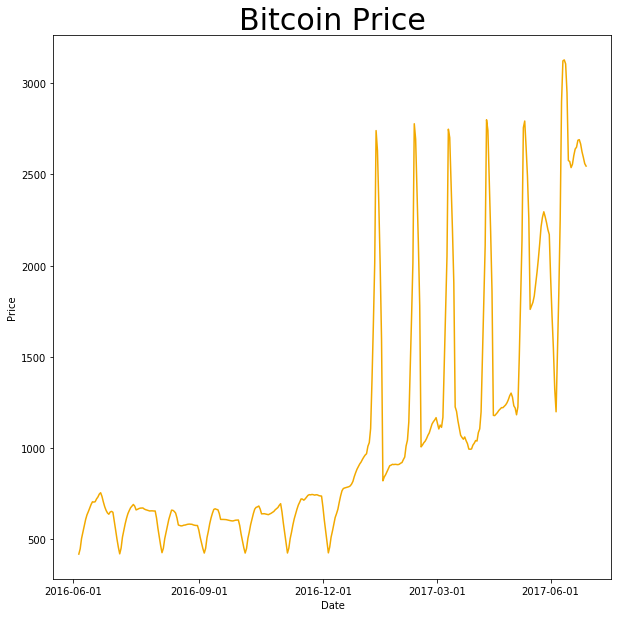

In [8]:

plt.figure(figsize=(10,10))
plt.plot(bitcoin['Date'],moveaver,color='#f2a900')
plt.title('Bitcoin Price',size = 30, weight=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(['2016-06-01','2016-09-01','2016-12-01','2017-03-01','2017-06-01'])
plt.show()

## Bonus Part

### 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때,
### 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다. 
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다. 
- 이동평균의 기준은 Open Column으로 계산합니다. 
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [10]:
ethereum = pd.read_csv('C:/Users/82103/Desktop/Devcourse/ETH_day.csv')
ethereum.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [11]:
ethereum = ethereum[ethereum['Date']>='2016-06-01']
ethereum = ethereum[ethereum['Date']<='2017-06-30']
ethereum = ethereum.sort_values(by = 'Date')
moveaver2 = ethereum['Open'].rolling(5).mean()
ethereum.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67


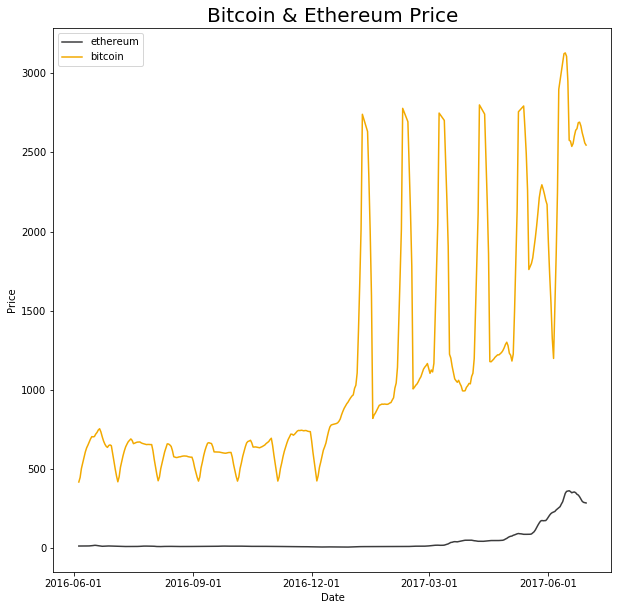

In [136]:
plt.figure(figsize=(10,10))
plt.plot(ethereum['Date'],moveaver2,color='#3c3c3d',label='ethereum')
plt.plot(bitcoin['Date'],moveaver,color='#f2a900',label='bitcoin')
plt.title("Bitcoin & Ethereum Price",size=20, weight = 20)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(['2016-06-01','2016-09-01','2016-12-01','2017-03-01','2017-06-01'])
plt.legend()
plt.show()